<a href="https://colab.research.google.com/github/benvictoria21/python-panda/blob/master/COVID_19_Deaths_in_the_US_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/python-panda/master/python%20pandas%20data/datasets_832494_1421899_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")

In [11]:
df.head()
df1 = df

In [13]:
df.shape

(1416, 13)

In [15]:
df.dtypes

Data as of                                   object
Start week                                   object
End Week                                     object
State                                        object
Sex                                          object
Age group                                    object
COVID-19 Deaths                             float64
Total Deaths                                float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
Footnote                                     object
dtype: object

In [16]:
num_col = df[df.dtypes[df.dtypes=='float64'].reset_index()["index"]]
df[num_col.columns.to_list()] = num_col.fillna(num_col.median())

In [17]:
df.isna().sum()

Data as of                                    0
Start week                                    0
End Week                                      0
State                                         0
Sex                                           0
Age group                                     0
COVID-19 Deaths                               0
Total Deaths                                  0
Pneumonia Deaths                              0
Pneumonia and COVID-19 Deaths                 0
Influenza Deaths                              0
Pneumonia, Influenza, or COVID-19 Deaths      0
Footnote                                    536
dtype: int64

In [19]:
df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,08/12/2020,02/01/2020,08/08/2020,United States,All,Under 1 year,16.0,9159.0,83.0,2.0,15.0,112.0,NaN
1,08/12/2020,02/01/2020,08/08/2020,United States,All,1-4 years,10.0,1751.0,56.0,2.0,41.0,105.0,NaN
2,08/12/2020,02/01/2020,08/08/2020,United States,All,5-14 years,23.0,2714.0,88.0,7.0,51.0,155.0,NaN
3,08/12/2020,02/01/2020,08/08/2020,United States,All,15-24 years,242.0,17079.0,340.0,81.0,52.0,549.0,NaN
4,08/12/2020,02/01/2020,08/08/2020,United States,All,25-34 years,1133.0,35456.0,1297.0,499.0,150.0,2067.0,NaN


In [20]:
def clean_name(name):
    return name.lower().strip().replace(" ", "_").replace(",", "_").replace("-", "_")

In [21]:
df.rename(columns=clean_name, inplace=True)

In [23]:
df.head()

,data_as_of,start_week,end_week,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths,footnote
0,08/12/2020,02/01/2020,08/08/2020,United States,All,Under 1 year,16.0,9159.0,83.0,2.0,15.0,112.0,NaN
1,08/12/2020,02/01/2020,08/08/2020,United States,All,1-4 years,10.0,1751.0,56.0,2.0,41.0,105.0,NaN
2,08/12/2020,02/01/2020,08/08/2020,United States,All,5-14 years,23.0,2714.0,88.0,7.0,51.0,155.0,NaN
3,08/12/2020,02/01/2020,08/08/2020,United States,All,15-24 years,242.0,17079.0,340.0,81.0,52.0,549.0,NaN
4,08/12/2020,02/01/2020,08/08/2020,United States,All,25-34 years,1133.0,35456.0,1297.0,499.0,150.0,2067.0,NaN


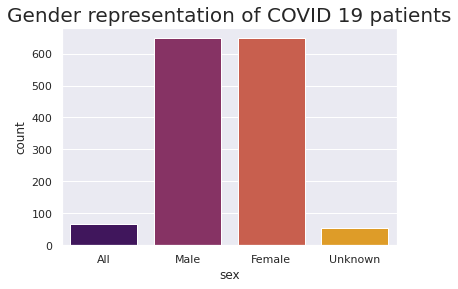

In [24]:
sns.set()
plt.title("Gender representation of COVID 19 patients", fontdict={'fontsize': 20})
sns.countplot(df.sex, palette="inferno")
plt.show()

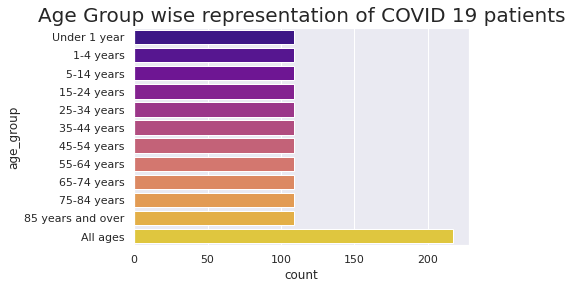

In [25]:
sns.set()
plt.title("Age Group wise representation of COVID 19 patients", fontdict={'fontsize': 20})
sns.countplot(y=df.age_group, palette="plasma")
plt.show()

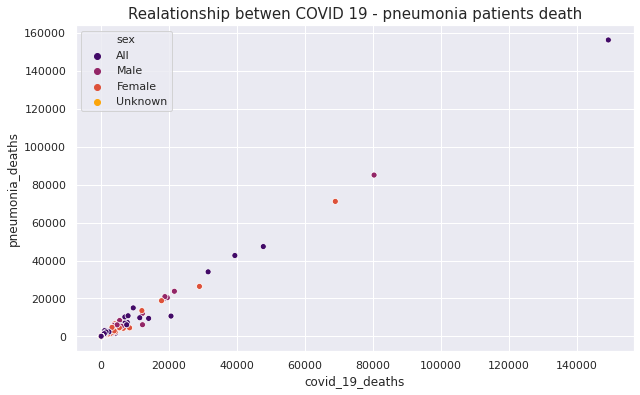

In [26]:
sns.set()
plt.figure(figsize =  (10,6))
plt.title("Realationship betwen COVID 19 - pneumonia patients death", fontdict={'fontsize': 15})
sns.scatterplot(x = "covid_19_deaths", y = "pneumonia_deaths", data= df, palette="inferno", hue = "sex")
plt.show()

In [27]:
state = df.groupby("state")["covid_19_deaths"].count().reset_index().sort_values(by = "covid_19_deaths", ascending= False)[:5]

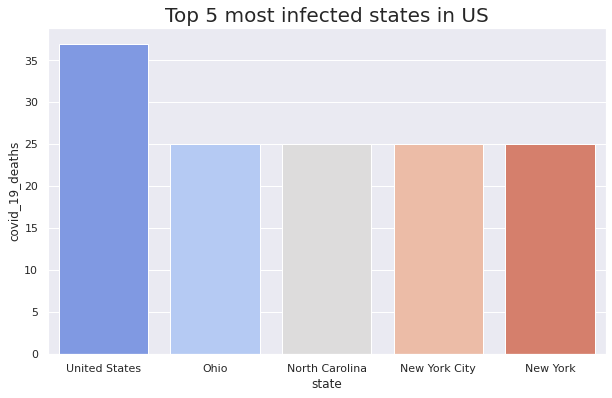

In [28]:
sns.set()
plt.figure(figsize =  (10,6))
plt.title("Top 5 most infected states in US", fontdict={'fontsize': 20})
sns.barplot(x = "state", y ="covid_19_deaths", data = state, palette="coolwarm")
plt.show()